Prediction of Surplus Food Production

Linear Regression and Lasso Regression

In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [437]:
# loading the data from csv file to pandas dataframe
food_dataset = pd.read_csv('/content/databse ml.csv')

In [438]:
food_dataset.head()

,year,sector,food_type,tons_supply,tons_surplus,tons_waste,tons_uneaten,tons_anaerobically_digested,tons_composted,tons_landfilled,meals_wasted
0,2019,Farm,Dry Goods,6428604.73,1230837.32,1081247.44,1201758.99,0.00,0.00,24666.80,2.002932e+09
1,2019,Farm,Produce,95442734.37,15517466.15,13628429.21,15264852.80,0.00,0.00,185655.33,2.544142e+10
2,2019,Foodservice,Breads & Bakery,31107.73,570.81,482.15,556.45,0.14,72.23,432.69,9.274164e+05
3,2019,Foodservice,Dairy & Eggs,14798.32,271.54,229.36,264.71,0.07,34.36,205.84,4.411830e+05
4,2019,Foodservice,Dry Goods,26451.91,485.38,409.99,473.17,0.12,61.42,367.93,7.886122e+05


In [439]:
# checking the number of rows and columns
food_dataset.shape

(2900, 11)

In [440]:
# getting some information about the dataset
food_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         2900 non-null   int64  
 1   sector                       2900 non-null   object 
 2   food_type                    2900 non-null   object 
 3   tons_supply                  2900 non-null   float64
 4   tons_surplus                 2900 non-null   float64
 5   tons_waste                   2900 non-null   float64
 6   tons_uneaten                 2900 non-null   float64
 7   tons_anaerobically_digested  2900 non-null   float64
 8   tons_composted               2900 non-null   float64
 9   tons_landfilled              2900 non-null   float64
 10  meals_wasted                 2900 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 249.3+ KB


In [441]:
# checking the number of missing values
food_dataset.isnull().sum()

year                           0
sector                         0
food_type                      0
tons_supply                    0
tons_surplus                   0
tons_waste                     0
tons_uneaten                   0
tons_anaerobically_digested    0
tons_composted                 0
tons_landfilled                0
meals_wasted                   0
dtype: int64

In [442]:
 #checking the distribution of categorical data
print(food_dataset.sector.value_counts())
print(food_dataset.food_type.value_counts())

Foodservice      2640
Manufacturing      80
Residential        80
Retail             80
Farm               20
Name: sector, dtype: int64
Dry Goods                   390
Produce                     380
Dairy & Eggs                380
Prepared Foods              380
Breads & Bakery             370
Fresh Meat & Seafood        370
Ready-to-drink Beverages    370
Frozen                      260
Name: food_type, dtype: int64


Encoding the categorical data 

In [443]:
# encoding "sector" Column
food_dataset.replace({'sector':{'Foodservice':0,'Manufacturing':1,'Residential':2,'Retail':3,'Farm':3}},inplace=True)



In [444]:
# encoding "food_type" Column
food_dataset.replace({'food_type':{'Dry Goods':0,'Produce':1,'Dairy & Eggs':2,'Prepared Foods':3,'Breads & Bakery':3,'Fresh Meat & Seafood':4,'Ready-to-drink Beverages':5,'Frozen':6}},inplace=True)


In [445]:
food_dataset.head()

,year,sector,food_type,tons_supply,tons_surplus,tons_waste,tons_uneaten,tons_anaerobically_digested,tons_composted,tons_landfilled,meals_wasted
0,2019,3,0,6428604.73,1230837.32,1081247.44,1201758.99,0.00,0.00,24666.80,2.002932e+09
1,2019,3,1,95442734.37,15517466.15,13628429.21,15264852.80,0.00,0.00,185655.33,2.544142e+10
2,2019,0,3,31107.73,570.81,482.15,556.45,0.14,72.23,432.69,9.274164e+05
3,2019,0,2,14798.32,271.54,229.36,264.71,0.07,34.36,205.84,4.411830e+05
4,2019,0,0,26451.91,485.38,409.99,473.17,0.12,61.42,367.93,7.886122e+05


Splitting the data and target

In [446]:
X = food_dataset.drop(['tons_surplus','tons_waste','tons_landfilled','tons_anaerobically_digested','meals_wasted','tons_composted'],axis=1)
Y = food_dataset['tons_surplus']

In [447]:
print(X)

      year  sector  food_type  tons_supply  tons_uneaten
0     2019       3          0   6428604.73    1201758.99
1     2019       3          1  95442734.37   15264852.80
2     2019       0          3     31107.73        556.45
3     2019       0          2     14798.32        264.71
4     2019       0          0     26451.91        473.17
...    ...     ...        ...          ...           ...
2895  2010       3          4  10204863.96     357748.43
2896  2010       3          6  13258202.04     495568.98
2897  2010       3          3   3758004.64     144800.96
2898  2010       3          1  24719165.36    2507267.64
2899  2010       3          5  13872145.90     499745.56

[2900 rows x 5 columns]


In [448]:
print(Y)

0        1230837.32
1       15517466.15
2            570.81
3            271.54
4            485.38
           ...     
2895      443489.75
2896      612625.91
2897      179003.98
2898     3099502.18
2899      665089.18
Name: tons_surplus, Length: 2900, dtype: float64


In [449]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [450]:
print(X.shape, X_train.shape, X_test.shape)

(2900, 5) (2320, 5) (580, 5)


Model Training

1. Linear Regression

In [451]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [452]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [453]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [454]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9983421762142314


Accuracy

In [455]:
regressor = LinearRegression()
regressor.fit(X_test,Y_test)
regressor.score(X_test, Y_test)

0.9993778648878631

Visualising actual and predicted value

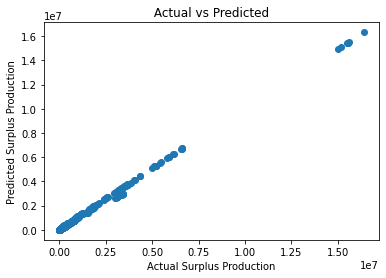

In [456]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Surplus Production")
plt.ylabel("Predicted Surplus Production")
plt.title(" Actual vs Predicted ")
plt.show()

In [457]:
import pickle

In [458]:
filename = 'food_model.sav'
pickle.dump(lin_reg_model,open(filename, 'wb'))

In [459]:
# loading the saved model
loaded_model = pickle.load(open('food_model.sav', 'rb'))

In [460]:
import numpy as np
input_data = ('2019','3','0','6428604','1201758.99')

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[1381608.77521445]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [461]:
for column in X.columns:
  print(column)

year
sector
food_type
tons_supply
tons_uneaten
